# Author: Makayla McKibben
## Course: DSC540 Data Preparation
## Exercise for Weeks 9 & 10
## Date: 11.03.2024

In [208]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import json
import urllib
from PIL import Image

## Activity 7.01

In [210]:
# Set url to scrape from
url = 'https://www.gutenberg.org/browse/scores/top'
# Get info
response = requests.get(url)

In [211]:
# See if we were able to succesfully obtain the data
if response.status_code == 200:
    print('Able to retrieve the response.')
    pass
else:
    print('Something went wrong!')

Able to retrieve the response.


In [212]:
# Decode response 
decoded = response.content.decode(response.encoding)
decoded

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n <meta charset="UTF-8"/>\n\n<title>Top 100 | Project Gutenberg</title>\n <link rel="stylesheet" href="/gutenberg/style.css?v=1.1">\n <link rel="stylesheet" href="/gutenberg/collapsible.css?1.1">\n <link rel="stylesheet" href="/gutenberg/new_nav.css?v=1.321231">\n<link rel="stylesheet" href="/gutenberg/pg-desktop-one.css">\n <meta name="viewport" content="width=device-width, initial-scale=1">\n <meta name="keywords" content="books, ebooks, free, kindle, android, iphone, ipad"/>\n <meta name="google-site-verification" content="wucOEvSnj5kP3Ts_36OfP64laakK-1mVTg-ptrGC9io"/>\n <meta name="alexaVerifyID" content="4WNaCljsE-A82vP_ih2H_UqXZvM"/>\n <link rel="copyright" href="https://www.gnu.org/copyleft/fdl.html"/>\n <link rel="icon" type="image/png" href="/gutenberg/favicon.ico" sizes="16x16" />\n <meta property="og:title"        content="Project Gutenberg" />\n <meta property="og:type"         content="website" />\n <

In [213]:
# Create BeautifulSoup soup
soup = BeautifulSoup(decoded, 'html.parser')
soup

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Top 100 | Project Gutenberg</title>
<link href="/gutenberg/style.css?v=1.1" rel="stylesheet"/>
<link href="/gutenberg/collapsible.css?1.1" rel="stylesheet"/>
<link href="/gutenberg/new_nav.css?v=1.321231" rel="stylesheet"/>
<link href="/gutenberg/pg-desktop-one.css" rel="stylesheet"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="books, ebooks, free, kindle, android, iphone, ipad" name="keywords">
<meta content="wucOEvSnj5kP3Ts_36OfP64laakK-1mVTg-ptrGC9io" name="google-site-verification"/>
<meta content="4WNaCljsE-A82vP_ih2H_UqXZvM" name="alexaVerifyID"/>
<link href="https://www.gnu.org/copyleft/fdl.html" rel="copyright">
<link href="/gutenberg/favicon.ico" rel="icon" sizes="16x16" type="image/png">
<meta content="Project Gutenberg" property="og:title"/>
<meta content="website" property="og:type"/>
<meta content="https://www.gutenberg.org/" proper

In [214]:
# Create empty list to store all links
links = []
# Find href tags
for link in soup.find_all('a'):
    # Append link to list
    links.append(link.get('href'))

In [215]:
# Get the top 100 books from the list
top_100 = links[34:134]
top_100

['/ebooks/25558',
 '/ebooks/84',
 '/ebooks/2701',
 '/ebooks/1513',
 '/ebooks/1342',
 '/ebooks/100',
 '/ebooks/145',
 '/ebooks/2641',
 '/ebooks/37106',
 '/ebooks/67979',
 '/ebooks/16389',
 '/ebooks/11',
 '/ebooks/6761',
 '/ebooks/394',
 '/ebooks/6593',
 '/ebooks/5197',
 '/ebooks/2160',
 '/ebooks/1259',
 '/ebooks/4085',
 '/ebooks/345',
 '/ebooks/25344',
 '/ebooks/174',
 '/ebooks/41',
 '/ebooks/5200',
 '/ebooks/1080',
 '/ebooks/2542',
 '/ebooks/844',
 '/ebooks/76',
 '/ebooks/1998',
 '/ebooks/64317',
 '/ebooks/98',
 '/ebooks/43',
 '/ebooks/2554',
 '/ebooks/46',
 '/ebooks/28054',
 '/ebooks/2650',
 '/ebooks/1952',
 '/ebooks/1661',
 '/ebooks/4300',
 '/ebooks/2000',
 '/ebooks/1400',
 '/ebooks/2600',
 '/ebooks/1184',
 '/ebooks/1232',
 '/ebooks/8492',
 '/ebooks/6130',
 '/ebooks/3207',
 '/ebooks/2591',
 '/ebooks/408',
 '/ebooks/1260',
 '/ebooks/4363',
 '/ebooks/49010',
 '/ebooks/3296',
 '/ebooks/74662',
 '/ebooks/50150',
 '/ebooks/30254',
 '/ebooks/5740',
 '/ebooks/74',
 '/ebooks/1727',
 '/ebooks

In [216]:
# Create empty list
numbers = []
# Iterate through the top 100
for item in top_100:
    # make sure our value is a string
    item = str(item)
    # Split the string
    lft, rgt = item.split(sep = '/ebooks/')
    # Append numbers to list
    numbers.append(rgt)

# Print numbers list
print('The top 100 book file numbers are: ', numbers)

The top 100 book file numbers are:  ['25558', '84', '2701', '1513', '1342', '100', '145', '2641', '37106', '67979', '16389', '11', '6761', '394', '6593', '5197', '2160', '1259', '4085', '345', '25344', '174', '41', '5200', '1080', '2542', '844', '76', '1998', '64317', '98', '43', '2554', '46', '28054', '2650', '1952', '1661', '4300', '2000', '1400', '2600', '1184', '1232', '8492', '6130', '3207', '2591', '408', '1260', '4363', '49010', '3296', '74662', '50150', '30254', '5740', '74', '1727', '74665', '768', '16328', '2814', '27827', '29145', '33283', '31552', '7370', '36034', '16119', '1497', '8800', '19942', '45', '244', '10007', '31284', '17489', '205', '34901', '2148', '779', '514', '135', '2680', '398', '996', '74657', '74664', '132', '5827', '1636', '4280', '1251', '38358', '219', '74661', '67098', '26471', '23']


In [217]:
# Get the text from soup print 2000 char
soupy = soup.text
soupy[0:2000]

"\n\n\n\nTop 100 | Project Gutenberg\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMenu▾\n\n\n\nAbout\n          ▾\n\n▾\n\n\nAbout Project Gutenberg\nCollection Development\nContact Us\nHistory & Philosophy\nPermissions & License\nPrivacy Policy\nTerms of Use\n\n\n\nSearch and Browse\n      \t  ▾\n\n▾\n\n\nBook Search\nBookshelves\nFrequently Downloaded\nOffline Catalogs\n\n\n\nHelp\n          ▾\n\n▾\n\n\nAll help topics →\nCopyright How-To\nErrata, Fixes and Bug Reports\nFile Formats\nFrequently Asked Questions\nPolicies →\nPublic Domain eBook Submission\nSubmitting Your Own Work\nTablets, Phones and eReaders\nThe Attic →\n\n\nDonate\n\n\n\n\n\n\n\n\n\n\nWays to donate\n\n\n\n\n\n\n\nTo determine the ranking we count the times each file gets downloaded.\nBoth HTTP and FTP transfers are counted.\nOnly transfers from ibiblio.org are counted as we have no access to our mirrors log files.\nMultiple downloads from the same IP address on the same day count as one download.\nIP addr

In [218]:
# Create list with our soup data
top_hundo_yester = soup.text.splitlines()
top_hundo_yester

['',
 '',
 '',
 '',
 'Top 100 | Project Gutenberg',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'Menu▾',
 '',
 '',
 '',
 'About',
 '          ▾',
 '',
 '▾',
 '',
 '',
 'About Project Gutenberg',
 'Collection Development',
 'Contact Us',
 'History & Philosophy',
 'Permissions & License',
 'Privacy Policy',
 'Terms of Use',
 '',
 '',
 '',
 'Search and Browse',
 '      \t  ▾',
 '',
 '▾',
 '',
 '',
 'Book Search',
 'Bookshelves',
 'Frequently Downloaded',
 'Offline Catalogs',
 '',
 '',
 '',
 'Help',
 '          ▾',
 '',
 '▾',
 '',
 '',
 'All help topics →',
 'Copyright How-To',
 'Errata, Fixes and Bug Reports',
 'File Formats',
 'Frequently Asked Questions',
 'Policies →',
 'Public Domain eBook Submission',
 'Submitting Your Own Work',
 'Tablets, Phones and eReaders',
 'The Attic →',
 '',
 '',
 'Donate',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'Ways to donate',
 '',
 '',
 '',
 '',
 '',
 '

In [219]:
# Remove empty strings
str_lst = list(filter(str.strip, top_hundo_yester))
str_lst

['Top 100 | Project Gutenberg',
 'Menu▾',
 'About',
 '          ▾',
 '▾',
 'About Project Gutenberg',
 'Collection Development',
 'Contact Us',
 'History & Philosophy',
 'Permissions & License',
 'Privacy Policy',
 'Terms of Use',
 'Search and Browse',
 '      \t  ▾',
 '▾',
 'Book Search',
 'Bookshelves',
 'Frequently Downloaded',
 'Offline Catalogs',
 'Help',
 '          ▾',
 '▾',
 'All help topics →',
 'Copyright How-To',
 'Errata, Fixes and Bug Reports',
 'File Formats',
 'Frequently Asked Questions',
 'Policies →',
 'Public Domain eBook Submission',
 'Submitting Your Own Work',
 'Tablets, Phones and eReaders',
 'The Attic →',
 'Donate',
 'Ways to donate',
 'To determine the ranking we count the times each file gets downloaded.',
 'Both HTTP and FTP transfers are counted.',
 'Only transfers from ibiblio.org are counted as we have no access to our mirrors log files.',
 'Multiple downloads from the same IP address on the same day count as one download.',
 'IP addresses that download m

In [220]:
# Create empty list
indices = []
# Set phrase to find
phrase = 'Top 100 EBooks yesterday'
# Find index of the list for phrase matching the target
[i for i,item in enumerate(str_lst) if item == phrase]

[53]

In [221]:
# Select titles based off index of matching list item with phrase
top_hund_titles = str_lst[54:154]
top_hund_titles

['呻吟語 by Kun Lü (4962)',
 'Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (3013)',
 'Moby Dick; Or, The Whale by Herman Melville (2194)',
 'Romeo and Juliet by William Shakespeare (2187)',
 'Pride and Prejudice by Jane Austen (2041)',
 'The Complete Works of William Shakespeare by William Shakespeare (1683)',
 'Middlemarch by George Eliot (1603)',
 'A Room with a View by E. M.  Forster (1575)',
 'Little Women; Or, Meg, Jo, Beth, and Amy by Louisa May Alcott (1512)',
 'The Blue Castle: a novel by L. M.  Montgomery (1418)',
 'The Enchanted April by Elizabeth Von Arnim (1393)',
 "Alice's Adventures in Wonderland by Lewis Carroll (1387)",
 'The Adventures of Ferdinand Count Fathom — Complete by T.  Smollett (1313)',
 'Cranford by Elizabeth Cleghorn Gaskell (1307)',
 'History of Tom Jones, a Foundling by Henry Fielding (1291)',
 'My Life — Volume 1 by Richard Wagner (1279)',
 'The Expedition of Humphry Clinker by T.  Smollett (1277)',
 'Twenty years after by Alexandr

In [222]:
# Create the just text list
just_text = []
# Iterate through title text one line at a time
for item in top_hund_titles:
    # Ensure we're dealing with a string
    item = str(item) 
    # Split the data by the last occurence in a line of the left parenthases
    lft, rgt = item[::-1].split('(', 1)
    # Append to the list reversing the item so that it is correctly oriented
    just_text.append(rgt[::-1])
    
# Display title lines
just_text    

['呻吟語 by Kun Lü ',
 'Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley ',
 'Moby Dick; Or, The Whale by Herman Melville ',
 'Romeo and Juliet by William Shakespeare ',
 'Pride and Prejudice by Jane Austen ',
 'The Complete Works of William Shakespeare by William Shakespeare ',
 'Middlemarch by George Eliot ',
 'A Room with a View by E. M.  Forster ',
 'Little Women; Or, Meg, Jo, Beth, and Amy by Louisa May Alcott ',
 'The Blue Castle: a novel by L. M.  Montgomery ',
 'The Enchanted April by Elizabeth Von Arnim ',
 "Alice's Adventures in Wonderland by Lewis Carroll ",
 'The Adventures of Ferdinand Count Fathom — Complete by T.  Smollett ',
 'Cranford by Elizabeth Cleghorn Gaskell ',
 'History of Tom Jones, a Foundling by Henry Fielding ',
 'My Life — Volume 1 by Richard Wagner ',
 'The Expedition of Humphry Clinker by T.  Smollett ',
 'Twenty years after by Alexandre Dumas and Auguste Maquet ',
 'The Adventures of Roderick Random by T.  Smollett ',
 'Dracula by Bram

## Activity 7.02

In [224]:
# Welcome message
print('This program will search for information about a movie given a title. Enter "quit" at any time to exit the program.')

This program will search for information about a movie given a title. Enter "quit" at any time to exit the program.


In [225]:
# Set user_title 
user_title = ''
# Create while loop that breaks with sentinel quit
while user_title != 'quit':
    # Take title input from user
    user_title = input('What title would you like to search for?')
    # Make title lowercase
    user_title = user_title.lower()
    # Break if user enters quit
    if user_title == 'quit':
        # Print goodbye statement
        print('You have ended the program, good day.')
        # Break loop
        break
    # Verify the title entered is correct with user
    double_check = input('You entered {}, is that correct? Y/N'.format(user_title))
    # Make response lowercase
    double_check = double_check.lower()
    # Select first character
    double_check = double_check[0]
    # If correct input format title
    if double_check == 'y':
        # Format title
        user_title = user_title.lower()
        # Set parameters
        params = {'t': user_title, 'apikey': '22e4d01f'}
        # Set up try statement
        try:
            # Make get request using parameters
            response = requests.get('http://www.omdbapi.com/?', params = params)
            # Print some of the json data
            print("The title ", response.json()['Title'], " was released in ", response.json()['Year'], ". It's genre was ", response.json()['Genre'], "and it was rated ", response.json()['Rated'], ".")
        # Except which provides an error message and restarts loop
        except:
            print('Could not find the title as entered')
            pass
        # Try statement for image search and save
        try:
            poster_url = response.json()['Poster']
            urllib.request.urlretrieve(poster_url, 'image.jpg')
            print('Poster saved.')
            pass
        # Except which provides error and restarts loop
        except:
            print('Poster could not be saved')
            pass
    # Else if double check equals n
    elif double_check == 'n':
        # Print error message and loop
        print('Please enter a title or "quit"')
        pass
    # Else if double check equals q from quit break loop
    elif double_check == 'q':
        print('You have ended the program, good day.')
        break
    # Catch stray entries
    elif double_check != 'y' & double_check != 'n' & double_check != 'q':
        print('Please enter a title or "quit"')
        pass

What title would you like to search for? eragon
You entered eragon, is that correct? Y/N y


The title  Eragon  was released in  2006 . It's genre was  Action, Adventure, Family and it was rated  PG .
Poster saved.


What title would you like to search for? Random_error
You entered random_error, is that correct? Y/N y


Could not find the title as entered
Poster could not be saved


What title would you like to search for? Titanic
You entered titanic, is that correct? Y/N y


The title  Titanic  was released in  1997 . It's genre was  Drama, Romance and it was rated  PG-13 .
Poster saved.


What title would you like to search for? quit


You have ended the program, good day.


## Activity 3

In [227]:
# Set url
url = 'http://api.openweathermap.org/data/2.5/weather?'
# Set parameters
other_params = {'lat': '51.508', 'lon': '-0.126', 'appid': '46144b694f4c99bebf7ec067bf779439'}
# Make API call
response = requests.get(url, params = other_params)
# Print response
print(response.json())

{'coord': {'lon': -0.1275, 'lat': 51.5072}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 283.46, 'feels_like': 282.71, 'temp_min': 282.89, 'temp_max': 284.28, 'pressure': 1026, 'humidity': 83, 'sea_level': 1026, 'grnd_level': 1022}, 'visibility': 10000, 'wind': {'speed': 2.57, 'deg': 100}, 'clouds': {'all': 100}, 'dt': 1730707620, 'sys': {'type': 2, 'id': 2075535, 'country': 'GB', 'sunrise': 1730703590, 'sunset': 1730737697}, 'timezone': 0, 'id': 2643743, 'name': 'London', 'cod': 200}


## Activity 4

In [229]:
# Read df
schizo = pd.read_csv('EEG Schizophrenia/EEG Schizo/EEG Schizo A/s01.csv')
schizo

,Fp2,F8,T4,T6,O2,Fp1,F7,T3,T5,O1,F4,C4,P4,F3,C3,P3,Fz,Cz,Pz
0,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09
1,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09
2,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09
3,2.500000e-09,2.500000e-09,2.500000e-09,3.083103e-07,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,3.083103e-07,2.500000e-09,2.500000e-09,2.500000e-09,-1.504051e-07,-3.033103e-07,2.500000e-09,-6.091205e-07,-3.033103e-07,-6.091205e-07,-7.620257e-07
4,2.500000e-09,2.500000e-09,2.500000e-09,1.554051e-07,2.500000e-09,2.500000e-09,2.500000e-09,1.554051e-07,3.083103e-07,-3.033103e-07,2.500000e-09,2.500000e-09,-3.033103e-07,-3.033103e-07,-1.504051e-07,-6.091205e-07,-4.562154e-07,-7.620257e-07,-7.620257e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211245,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09
211246,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09
211247,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09
211248,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09


Text(0, 0.5, 'Amplitude')

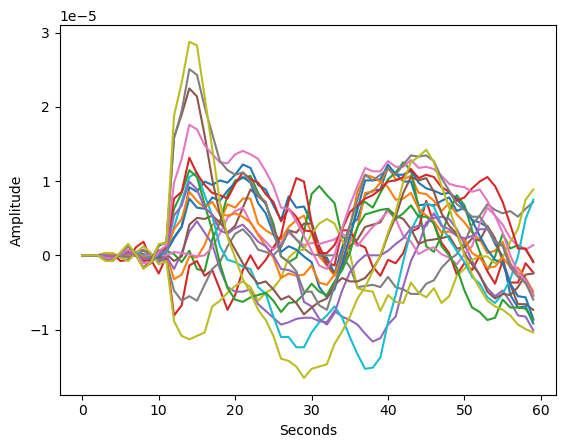

In [230]:
# Plot line chart
plt.plot(schizo[0:60])
plt.xlabel('Seconds')
plt.ylabel('Amplitude')

In [231]:
# Read df
reviews = pd.read_csv('Psychiatric_Drug_Reviews_WebMD.csv')
reviews

,Unnamed: 0,drug_name,date,age,gender,time_on_drug,reviewer_type,condition,rating_overall,rating_effectiveness,rating_ease_of_use,rating_satisfaction,text
0,0,Sertraline Oral,5/12/2024,45-54,Female,1 to less than 2 years,Patient,Posttraumatic Stress Syndrome,5.0,5,5,5,It's almost two years now and it has been so e...
1,1,Sertraline Oral,4/21/2024,35-44,Female,less than 1 month,Patient,Depression,1.0,1,1,1,Iv been on this 4 weeks and iv never felt so a...
2,2,Sertraline Oral,4/16/2024,25-34,Female,2 to less than 5 years,Patient,Repeated Episodes of Anxiety,4.3,4,4,5,Been taking sertraline for past 3 years. Had n...
3,3,Sertraline Oral,4/11/2024,45-54,Male,less than 1 month,Patient,Panic Disorder,1.7,1,3,1,"Of course, take this with a pinch of salt beca..."
4,4,Sertraline Oral,4/8/2024,13-18,Female,NaN,Patient,Major Depressive Disorder,3.0,2,4,3,used for a while saw no effects.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61315,61315,Risperdal Oral,9/25/2007,25-34,Female,less than 1 month,Patient,Additional Medications to Treat Depression,1.7,1,3,1,"I got so dizzy, sleepy with slurred speech, af..."
61316,61316,Risperdal Oral,9/25/2007,12-Jul,Male,1 to less than 2 years,Caregiver,Bipolar I Disorder with Most Recent Episode Mixed,2.0,1,4,1,"While the drug is easy to administer, there wa..."
61317,61317,Risperdal Oral,9/22/2007,19-24,Female,1 to 6 months,Patient,Bipolar I Disorder with Most Recent Episode Mixed,3.7,3,5,3,Not much significant improvement in mood. Made...
61318,61318,Risperdal Oral,9/19/2007,55-64,Male,1 to 6 months,Patient,Additional Medications to Treat Depression,4.3,4,5,4,"I've had chronic, ""refractory"" depression for ..."


Text(0.5, 0, 'Medication')

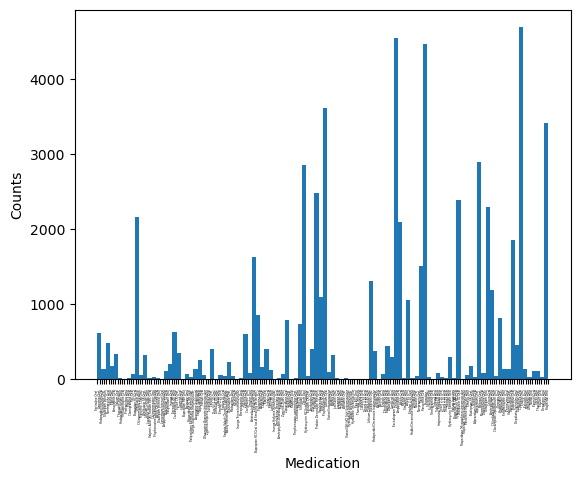

In [232]:
# Plot histogram
plt.hist(reviews['drug_name'], bins = 108)
plt.xticks(rotation = 90, size = 2)
plt.ylabel('Counts')
plt.xlabel('Medication')

In [233]:
# Read df
autos = pd.read_csv('auto-mpg.csv')
autos

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


Text(0, 0.5, 'MPG')

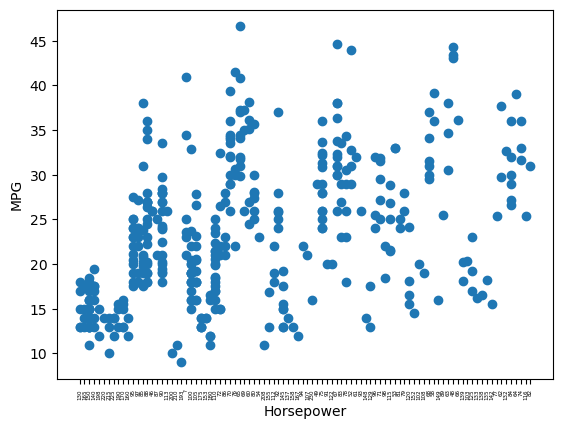

In [234]:
# Make scatter plot
plt.scatter(autos['horsepower'], autos['mpg'])
plt.xticks(rotation = 90, size = 4)
plt.xlabel('Horsepower')
plt.ylabel('MPG')